[0.0, 0.1]
[0.11111111111111112, 0.21111111111111114]
[0.22222222222222224, 0.32222222222222224]
[0.33333333333333337, 0.43333333333333335]
[0.4444444444444445, 0.5444444444444445]
[0.5555555555555556, 0.6555555555555556]
[0.6666666666666667, 0.7666666666666667]
[0.7777777777777779, 0.8777777777777779]
[0.888888888888889, 0.9888888888888889]
[1.0, 1.1]


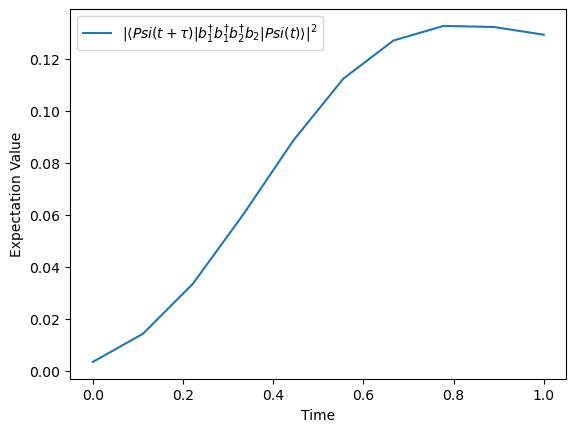

In [49]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

N = 10  
b1 = tensor(destroy(N), qeye(N))  
b2 = tensor(qeye(N), destroy(N))  
omega = 1.0
g_0 = 0.1

# 定义系统的哈密顿量 H 和观测量 Q
H0 = omega * (b1.dag() * b1 + b2.dag() * b2 + 1)
H1 = g_0/(omega**2) * ((b1.dag() + b1)**2) * ((b2.dag() + b2)**2)
H = H0 + H1  # 哈密顿量
Q1 = b1.dag() * b1.dag() * b2.dag() * b2
Q2 = b1.dag() * b1.dag() * b2 * b2.dag() 
Q3 = b1.dag() * b1 * b2.dag() * b2.dag() 
Q4 = b1 * b1.dag() * b2.dag() * b2.dag() 

psi0_1 = tensor(basis(N, 0), basis(N, 1))  

# 定义时间范围和时间间隔
t_list1 = np.linspace(0, 10, 10) # 时间范围
tau1 = 0.1  # 时间间隔

# 计算随时间演化的期望值
# expectation_values1 = []
possibility1 = []

for t1 in t_list1:
    t1_1 = t1 * tau1
    times1 = [t1_1,t1_1+tau1]
    print(times1)
    result = sesolve(H, psi0_1, times1, [])
    Psi_t1_plus_tau1 = result.states[1]
    Psi_t1 = result.states[0]
    # print(Psi_t1,Psi_t1_plus_tau1)
    expectation_value1 = Psi_t1_plus_tau1.dag() * Q1 * Psi_t1
    # expectation_values1.append(expectation_value1)
    possibility1.append(np.vdot(expectation_value1,expectation_value1))
    psi0_1 = Psi_t1_plus_tau1

# 绘制结果
plt.plot(t_list1*tau1, possibility1, label=r'$|\langle Psi(t+\tau) | b_1^{\dagger}b_1^{\dagger}b_2^{\dagger}b_2|Psi(t) \rangle|^2$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()


In [41]:
# psi0_2 = tensor(basis(N, 0), basis(N, 1))  

# # 定义时间范围和时间间隔
# t_list2 = np.linspace(0, 1000, 10**5) # 时间范围
# tau2 = 0.1  # 时间间隔

# # 计算随时间演化的期望值
# expectation_values2 = []
# possibility2 = []

# for t2 in t_list2:
#     times2 = [t2,t2+tau2]
#     result = sesolve(H, psi0_2, times2, [])
#     Psi_t2_plus_tau2 = result.states[1]
#     Psi_t2 = result.states[0]
#     expectation_value2 = Psi_t2_plus_tau2.dag() * Q2 * Psi_t2
#     possibility2.append(np.vdot(expectation_value2,expectation_value2))
 

# # 绘制结果

# plt.plot(t_list2, possibility2, label=r'$|\langle Ψ(t+\tau) | b_1^{\dagger}b_1^{\dagger}b_2b_2^{\dagger} | Ψ(t) \rangle|^2$')
# plt.xlabel('Time')
# plt.ylabel('Expectation Value')
# plt.legend()
# plt.show()

In [42]:
# psi0_3 = tensor(basis(N, 1), basis(N, 0))  

# # 定义时间范围和时间间隔
# t_list3 = np.linspace(0, 100, 100000) # 时间范围
# tau3 = 0.1  # 时间间隔

# # 计算随时间演化的期望值
# expectation_values3 = []
# possibility3 = []

# for t3 in t_list3:
#     times3 = [t3,t3+tau3]
#     result = sesolve(H, psi0_3, times3, [])
#     Psi_t3_plus_tau3 = result.states[1]
#     Psi_t3 = result.states[0]
#     expectation_value3 = Psi_t3_plus_tau3.dag() * Q3 * Psi_t3
#     possibility3.append(np.vdot(expectation_value3,expectation_value3))

# # 绘制结果
# plt.plot(t_list3, possibility3, label=r'$|\langle Ψ(t+\tau) | b_1^{\dagger}b_1b_2^{\dagger}b_2^{\dagger} | Ψ(t) \rangle|^2$')
# plt.xlabel('Time')
# plt.ylabel('Expectation Value')
# plt.legend()
# plt.show()

In [43]:
# psi0_4 = tensor(basis(N, 1), basis(N, 0))  

# # 定义时间范围和时间间隔
# t_list4 = np.linspace(0, 1000, 100000) # 时间范围
# tau4 = 0.1  # 时间间隔

# # 计算随时间演化的期望值
# expectation_values4 = []
# possibility4 = []

# for t4 in t_list4:
#     times4 = [t4,t4+tau4]
#     result = sesolve(H, psi0_4, times4, [])
#     Psi_t4_plus_tau4 = result.states[1]
#     Psi_t4 = result.states[0]
#     expectation_value4 = Psi_t4_plus_tau4.dag() * Q4 * Psi_t4
#     expectation_values4.append(expectation_value4)
#     possibility4.append(np.vdot(expectation_value4,expectation_value4))

# # 绘制结果
# plt.plot(t_list4, possibility4, label=r'$|\langle Ψ(t+\tau) | b_1b_1^{\dagger}b_2^{\dagger}b_2^{\dagger} | Ψ(t) \rangle|^2$')
# plt.xlabel('Time')
# plt.ylabel('Expectation Value')
# plt.legend()
# plt.show()